In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
import sympy
import matplotlib as mpl
mpl.rcParams['figure.dpi']=200
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [17]:
from sympy.codegen.cfunctions import Sqrt
s, x1, x2, y1, y2 = sympy.symbols('s, x_1, x_2, y_1, y_2')

n = sympy.Function("n")
S = x2**2 + y2**2

n = 1

np.random.seed(123)
center1 = np.random.uniform(-4,4,(20,2))
np.random.seed(123)
center2 = np.random.uniform(0.02, 0.5,(20,1))
center = np.hstack((center1, center2))
#n = sympy.exp(-(x**2 + (z1-1)**2)/0.05) + 1
for x_, y_, z_ in center:
    n += 0.5*sympy.exp(-((x1-x_)**2 + (y1-y_)**2)/z_)
#n = 3*(1-x)**2*sympy.exp(-(x**2) - (z1+1)**2) - 10*(x/5 - x**3 - z1**5)*sympy.exp(-x**2-z1**2) - 1/3*sympy.exp(-(x+1)**2 - z1**2)
#n = n/1.69 + 1
n = (n-1)/2*0.22 +1
n_ = sympy.lambdify((x1, y1), n)

RHS1 = 1/n * n.diff(x1) * S +x2**2/S -1/n * (n.diff(x1)*x2 + n.diff(y1) * y2) * x2
RHS1 = sympy.Lambda((x1, x2, y1, y2), RHS1)

RHS2 = 1/n * n.diff(y1) * S +y2**2/S -1/n * (n.diff(x1)*x2 + n.diff(y1) * y2) * y2
RHS2 = sympy.Lambda((x1, x2, y1, y2), RHS2)
def f(x1x2y1y2, s):
    x1, x2,y1, y2 = x1x2y1y2
    return [x2, RHS1(x1, x2, y1, y2), y2, RHS2(x1, x2, y1, y2)]

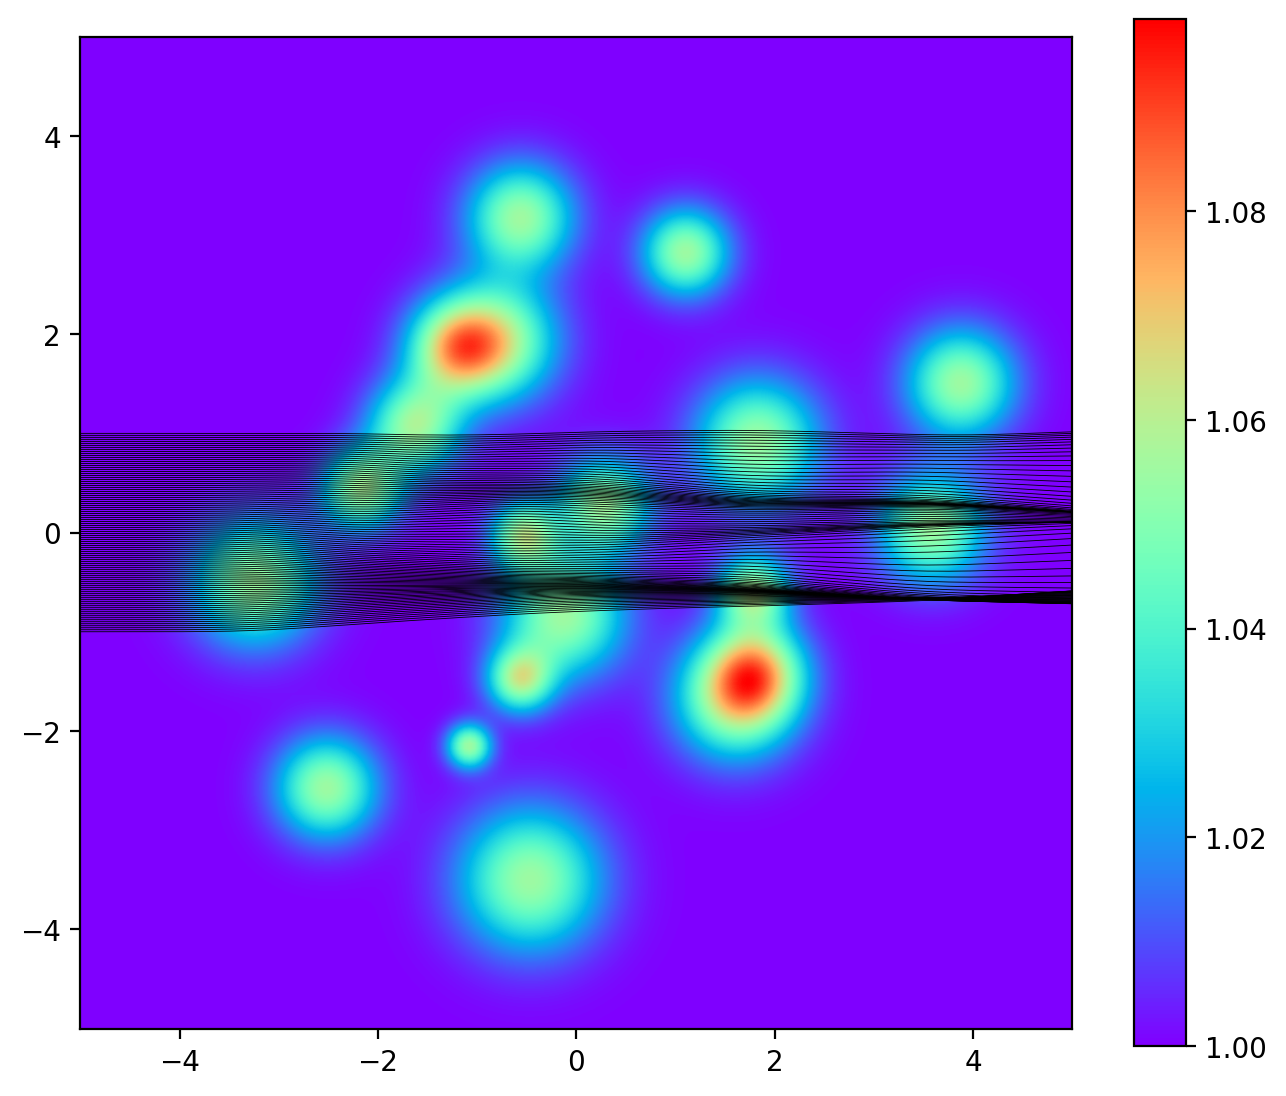

In [20]:
fig, ax = plt.subplots(1,1, figsize=(8,8))

for y1 in np.linspace(-1, 1, 100):
    x1x2y1y2 = [-5, 1, y1, 0]
    s = np.linspace(0, 30, 600)
    x1x2y1y2_x = integrate.odeint(f, x1x2y1y2, s, hmax=0.1)
    ax.plot(x1x2y1y2_x[:, 0], x1x2y1y2_x[:, 2], 'black', label='light ray',lw=0.3)


delta=0.05
x2 = y2 = np.arange(-5,5, delta)
X, Y = np.meshgrid(x2, y2)
Z = n_(X, Y)

im = ax.imshow(Z, interpolation='bilinear', cmap=cm.rainbow,
               origin='lower', extent=[-5, 5, -5, 5])
fig.colorbar(im, orientation='vertical', shrink=0.85)
#fig.savefig('light_ray9.jpg',dpi=400)

In [21]:
fig.savefig('light_ray15.jpg',dpi=400)

In [ ]:
import numpy as np
N=512
L=0.05
delta=0.05 #表面均方根粗糙度
betax=10 #x方向的相关长度
betay=10 #y方向的相关长度
C=1 #功率谱密度

dx=L/N
dy=dx
NN=-N/2:N/2-1;
[Nx,Ny]=meshgrid(NN,NN);
taux=dx.*Nx;tauy=dy.*Ny;

#生成具有指定自相关函数的粗糙表面
eta=np.randn(N,N);#高斯分布白噪声
A=np.fft2(eta);#傅里叶变换
R=zeros(N,N);
R=delta^2*exp(-2.3*((taux/betax).^2+(tauy/betay).^2).^0.5);%自相关函数
Gz=1/(2*pi^2).*fft2(R);%功率谱密度函数
H=(Gz/C).^0.5;%传递函数
Z=H.*A;%表面高度的傅里叶变换
z=ifft2(Z);%表面高度分布

figure(1)
meshz(abs(z));
title('rough surface');
axis square 

In [11]:
import numpy as  np
import scipy.fft

In [12]:
eta=np.random.randn(5, 5);#高斯分布白噪声
A=scipy.fft.fft2(eta);

In [14]:
scipy.fft.ifft2(A)

array([[ 0.51298071+0.j, -0.52141292+0.j,  2.80637411+0.j,
        -1.15498978+0.j, -1.10758133+0.j],
       [ 1.10675782+0.j, -0.69999487+0.j, -0.0044713 +0.j,
         0.98152325+0.j, -0.44450156+0.j],
       [-2.81330621+0.j, -1.07087674+0.j, -1.51387952+0.j,
         1.33100678+0.j, -0.23983903+0.j],
       [ 1.46525401+0.j, -0.71592958+0.j,  1.61178434+0.j,
         0.42807975+0.j, -0.26744122+0.j],
       [ 1.62035848+0.j, -1.01031664+0.j,  1.91539983+0.j,
        -0.9721094 +0.j,  1.07388455+0.j]])